In [1]:
#Importing require packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file 
df = pd.read_csv("data.csv")

In [3]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             2
Embarked         2
Survived         0
dtype: int64

In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,889.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.143391,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.732606,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.Fare.mean()

32.143390663667006

In [8]:
print("mean of fare",df.Fare.mean(),'\nMedian Fare:',df.Fare.median())

mean of fare 32.143390663667006 
Median Fare: 14.4542


In [9]:
#Age and Fare are numerical col but fare is skewed(right skewed)
df['Age'].fillna(df.Age.mean(),inplace = True)
df['Fare'].fillna(df.Fare.median(),inplace = True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


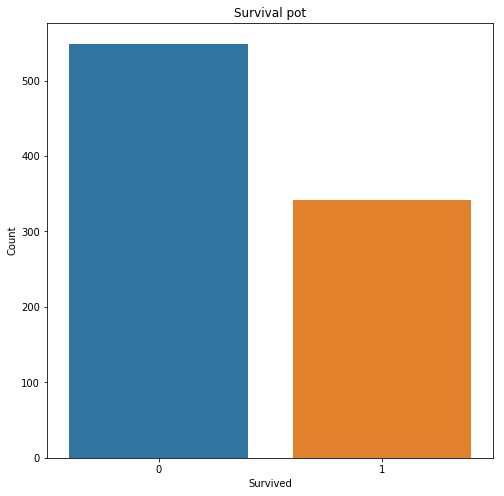

In [11]:
plt.figure(figsize =(8,8))
ax = sns.countplot(x ='Survived',data = df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival pot')
plt.show()

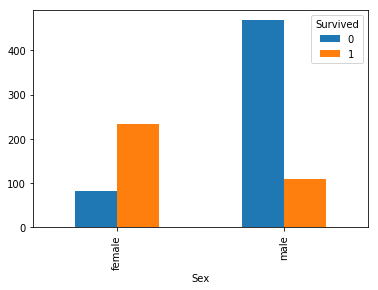

In [12]:
pd.crosstab(df.Sex,df.Survived).plot(kind ='bar');

In [13]:
#Avarage of Male Survival
df.groupby(['Sex','Survived']).mean()['Age']

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

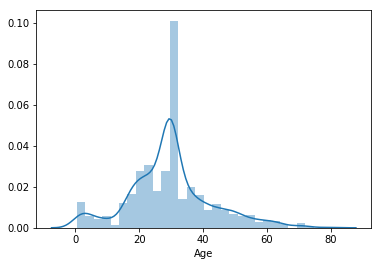

In [14]:
#Checking Anomalies, outliers and skewness
sns.distplot(df.Age);

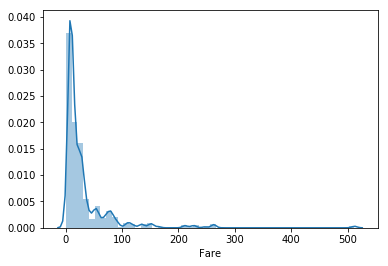

In [15]:
sns.distplot(df.Fare);

In [16]:
#dropping the PassngerID
del df["PassengerId"]

In [17]:
df.drop(['PassengerId'], axis = 1, inplace = True )

KeyError: "['PassengerId'] not found in axis"

In [18]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
#one-hot encoding
#data = pd.get_dummies(df,drop_first =True)
data = pd.get_dummies(df)

In [20]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [21]:
#modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [22]:
x = data[data.loc[:,data.columns!= 'Survived'].columns]
y = data['Survived']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state=0)

In [24]:
#model = logisticRegression(c= 0.001); #default c=1
Model=LogisticRegression();
Model.fit(x_train, y_train)
acc= Model.score(x_test,y_test)
print("Test Accuracy", acc)

Test Accuracy 0.7988826815642458


C:\Users\gitaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
y_pred = Model.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

   micro avg       0.80      0.80      0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Others question

In [27]:
prod =lambda x,y: x*y
print(prod(2,3))

6


In [28]:
lists= [2,4,5]
Squared= list(map(lambda x: x**2, lists))
Squared

[4, 16, 25]

In [29]:
def Factorial (num):
    factorial = 1
    #check if the number is negative, positive or zero
    if num < 0:
        print("Sorry the factorial doesn't exist for negative numbers")
    elif num == 0:
        print("The factorial of 0 is 1")
    else:
        for i in range (1,num + 1):
            factorial = factorial*i
        print("The factorial of", num, "is",factorial)
    

In [30]:
Factorial(5)

The factorial of 5 is 120


In [31]:
from functools import reduce
product = reduce((lambda x,y: x*y),[1,2,3,4])
product

24

In [32]:
number_list = range(-5,5)
print("original list =", list(number_list))
less_than_zero = list(filter(lambda x: x< 0,number_list))
print(less_than_zero)

original list = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[-5, -4, -3, -2, -1]


In [33]:
def OddNumSum(lists):
    return sum(filter(lambda x: x%2,lists),0)
lists = [2,3,4,7,8,18]
print(OddNumSum(lists))

10


In [40]:
#Pancake Algorithm
def flip(arr,i):
    start = 0
    while start <i:
        temp = arr[start]
        arr[start]=arr[i]
        arr[i] = temp
        start += 1
        i -=1
        
# Returns index of the maximum
#element in arr[0...n-1]*/
def findMax(arr,n):
    mi = 0
    for i in range (0,n):
        if arr[i] > arr[mi]:
            mi = i
    return mi

def NewSort(arr,n):
    curr_size = n
    while curr_size > 1:
        mi = findMax(arr,curr_size)
        if mi != curr_size -1:
            flip(arr,mi)
            flip(arr,curr_size-1)
        curr_size -= 1
        
# A uility funtion to 
#print an array of size n
def printArray(arr,n):
        for i in range(0,n):
            print("%d"%(arr[i]),end =  " ")
            
#Driver program
arr = [23,10,20,11,12,6,7]
n = len(arr)
NewSort(arr,n);
print("Sorted array")
printArray(arr,n)

Sorted array
6 7 10 11 12 20 23 